#  Socket Programming

In [ ]:
#TCP

In [5]:
#UDP
%%writefile udp_client.py
import socket
host=socket.gethostname()#"192.168.104.22" write ip address of diff pc to communicate
port=5000
udp_client=socket.socket(type=socket.SOCK_DGRAM)
while True:
    data=input("Enter data to send:")
    if not data:
        break
    udp_client.sendto(data.encode(),(host,port))
    data,addr=udp_client.recvfrom(1024)
    if not data:
        break
    print("recieved:",data.decode())
udp_client.close()

Overwriting udp_client.py


In [4]:
%%writefile server_udp.py
import socket
host=""
port=5000
addr=(host,port)
udp_server=socket.socket(type=socket.SOCK_DGRAM)
udp_server.bind(addr)
while True:
    print("Waiting for message")
    data,addr=udp_server.recvfrom(1024)
    print("recieved:",data.decode(),'from:',addr)
    msg=input("enter msg:")
    udp_server.sendto(msg.encode(),addr)
udp_server.close()

Writing server_udp.py


# Simple Web Browser in Python

In [6]:
import socket
mysock=socket.socket()
mysock.connect(('data.pr4e.org',80))
cmd='GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)
while True:
    data=mysock.recv(512)
    if len(data)<1:
        break
    print(data.decode(),end="")
    mysock.close()

gaierror: [Errno 11001] getaddrinfo failed

# Simple HTTP sever in Python

In [1]:
from socket import *
def createServer():
    serversocket=socket()
    serversocket.bind(('localhost',9000))
    serversocket.listen()
    while True:
        (clientsocket,address)=serversocket.accept()
        rd=clientsocket.recv(512).decode()
        print(rd)
        data="HTTP/1.0 200 OK\r\n"
        data+="Content.Type:text/html;charset=utf-8\r\n"
        data+="\r\n"
        data+='<html><body>Hello World</body></html>\r\n\r\n'
        clientsocket.send(data.encode())
    serversocket.close()

In [ ]:
print('Access http://localhost:9000')
createServer()

Access http://localhost:9000
GET / HTTP/1.1
Host: localhost:9000
Connection: keep-alive
sec-ch-ua: "Chromium";v="136", "Microsoft Edge";v="136", "Not.A/Brand";v="99"
sec-ch-ua-mobile: ?0
sec-ch-ua-platform: "Windows"
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36 Edg/136.0.0.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7
Sec-




# Web Scraping

In [1]:
import requests
from bs4 import BeautifulSoup
request_url="https://subslikescript.com/movie/Titanic-120338"
result=requests.get(request_url)
content=result.text

In [3]:
soup=BeautifulSoup(content,'html.parser')
print(soup.prettify())#pretiffy used for proper formatting

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-120598793-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-120598793-1');
  </script>
  <meta charset="utf-8"/>
  <title>
   Titanic (1997) Movie Script
 | Subs like Script
  </title>
  <meta "="" content="    Read " created="" from="" movie="" name="description" script,="" srt="" subtitles="" titanic"=""/>
  <meta content="    transcript, movie, subtitles, scripts, film, video, media, subs, srt
" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <meta content="WW7WB9wPl9u4QEIMsdYY3IkM4057EQQoOdaM3JNY" name="csrf-token"/>
  <meta content="WW7WB9wPl9u4QEIMsdY

In [6]:
soup.find('h1').text.strip()

'Titanic (1997) - full transcript'

In [7]:
soup.find_all('a')#or findAll

[<a href="/" title="Subs like Script - all Movies and TV Shows Transcripts">
 <span>SUBSLIKESCRIPT</span>
 </a>,
 <a href="/movies" target="_self" title="All movies transcripts">Movies</a>,
 <a href="/series" target="_self" title="All Tv Shows transcripts">TV Shows</a>,
 <a href="/">Home</a>,
 <a href="/movies">Movies</a>,
 <a href="/movies">All movie scripts</a>,
 <a href="/series">All Tv-Show scripts</a>,
 <a href="/dmca">DMCA</a>]

In [17]:
transcript=soup.find('div',class_='full-script').text.strip()
print(transcript)

13 meters. You should see it.


Okay, take her up and over the bow rail.


Mir 2, we're going over the bow.
Stay with us.


Okay, quiet. We're rolling.


Seeing her coming out of the
darkness like a ghost ship...


still gets me every time.


To see the sad ruin of the
great ship sitting here...


where she landed at
2:30 in the morning


of April 15, 1912...


after her long fall...


from the world above.


You are so full of shit, boss.


Dive 6. Here we are again
on the deck of Titanic.


21/2 miles down. 3,821 meters.


The pressure outside is
31/2 tons per square inch.


These windows are
9 inches thick.


If they go, it's sayonara
in two microseconds.


All right, enough of that bullshit.


Just put her down on the roof of
the officers' quarters like yesterday.


Mir 2, we're landing right over the
Grand Staircase. You guys set to launch?


Yeah, Brock. Launching Dunkin now.
Go, Charlie.


- All right, tether out.
- Tether out.


Okay, Brock, we're dropping
down along the hull.


In [19]:
file=open("titanic.txt",'w',encoding='utf-8')#encoding utf-8 should be written compulsory
file.write(transcript)
file.close()

In [1]:
import requests
from bs4 import BeautifulSoup
request_url="https://subslikescript.com/movie/Logan-3315342"
result=requests.get(request_url)
content=result.text

In [2]:
soup=BeautifulSoup(content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-120598793-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-120598793-1');
  </script>
  <meta charset="utf-8"/>
  <title>
   Logan (2017) Movie Script
 | Subs like Script
  </title>
  <meta "="" content="    Read " created="" from="" logan"="" movie="" name="description" script,="" srt="" subtitles=""/>
  <meta content="    transcript, movie, subtitles, scripts, film, video, media, subs, srt
" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <meta content="G0701idh8K0W1dYs39UXuh6MqUogzLlzVtL8LQ7w" name="csrf-token"/>
  <meta content="G0701idh8K0W1dYs39UXuh6

In [3]:
transcript=soup.find('div',class_='full-script').text.strip()
print(transcript)

We get the wheels, we get la feria,


we keep moving on.
No messing around.


You mess those wheels up
this time, Chong,


I'm gonna have your ass.


Move!


Right there, homes.


There's nobody, homes.


Where's your party, boy?


Turn down the radio.


You inviting the cops too or what?


I want El cromo.


Gonna get some green


for this shit right here, homes.


Fuck.


Hey guys?


Those are chrome-plated lugs.
You're gonna strip them.


Look at this guy?


The plating flakes off.


Yeah?


This is a lease.
No one's gonna pay to ride...


Shit.


Come on, man.


Hey guys.


Guys.


What the fuck?


Guys seriously, you don't wanna do this.


Take him out.


Fuck him up!


No! Not the car!


Get that puto!


Fuck him up, man!


Fuck him up!


Get him!


Hit that fool!


Motherfucker!


Shit.


Fuck.


Everyone's asleep, Burt.


Sleepwalking.
Between the ice caps,


the pornographers,
poisoned water, mutants...


it's all connected.


Hey, Clyde. It's 2029.


Why are we still talking 

In [13]:
import requests
from bs4 import BeautifulSoup
request_url="https://subslikescript.com/movies"
result=requests.get(request_url)
content=result.text

In [14]:
soup=BeautifulSoup(content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-120598793-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-120598793-1');
  </script>
  <meta charset="utf-8"/>
  <title>
   All English transcripts for movies  | Subs like Script
  </title>
  <meta content="List of movie scripts " name="description"/>
  <meta content="transcript, movie, subtitles, scripts, film, video, media, subs, srt " name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <meta content="OnZ6SG0IhR9hx9N9ZJx03ky7ot9wa2yFVauRbScD" name="csrf-token"/>
  <link as="style" href="https://subslikescript.com/build/assets/app-aqNRnyHK.css" rel="preload"

In [17]:
x=soup.find('ul',class_="scripts-list")
y=x.find_all('a')
l=[]
for i in y:
    l.append(i.text.strip())
print(l)
# print(transcript)

['Squeal ()', 'Vacation Home Nightmare (2023)', 'Love in Glacier National: A National Park Romance (2023)', 'Stars Fell Again (2023)', 'Daughter of the Bride (2023)', 'Hostile Forces (2023)', 'Lego Star Wars: The Padawan Menace (2011)', 'Gereza (2022)', 'Dragon Hunter (2022)', 'House of Inequity (2021)', 'Jackpot Island: Kumanthong Returns (2022)', 'Match (2022)', 'Snow White and the Fairytale Fun Force (2023)', 'The Love Club (2023)', 'Haunted Hotties (2022)', 'One Year Off (2023)', 'Sweeter Than Chocolate (2023)', 'Disquiet (2023)', 'Among the Beasts (2023)', 'Taming Speed (2022)', 'Randy Feltface: The Last Temptation of Randy (2020)', 'Alemanji (2021)', 'Darkheart Manor (2022)', 'Innocent Vengeance (2023)', 'Ho Ja Mukt (2023)', 'Boy from Nowhere (2023)', 'Rent-a-Groom (2023)', 'Unlocked (2023)', 'j-hope IN THE BOX (2023)', 'Suki (2023)']


In [18]:
import requests
from bs4 import BeautifulSoup
request_url="https://www.politifact.com/factchecks/"
result=requests.get(request_url)
content=result.text

In [19]:
soup=BeautifulSoup(content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fact-checks | PolitiFact
  </title>
  <meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="description">
   <meta content="all" name="robots">
    <meta content="PolitiFact" name="publisher"/>
    <meta content="PolitiFact" name="twitter:username">
     <meta content="summary" name="twitter:card">
      <meta content="PolitiFact" name="twitter:site"/>
      <meta content="" name="twitter:url">
       <meta content="" name="twitter:title"/>
       <meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="twitter:description"/>
       <meta content="vrxxsw8mwnf2pxgnwxvgsn4g93w3vm" name="f

In [25]:
x=soup.find('ul',class_="o-listicle__list")
y=x.find_all('div',class_="m-statement__quote")
l=[]
for i in y:
    z=i.find('a')
    l.append(z.text.strip())
print(l)
print(len(l))

['The state budget contains the largest middle class tax cut in 70 years.', 'Image shows Ben & Jerry’s is selling “Free Palestine” and “From the River to Sea” ice cream flavors.', '“Contractors are being rejected” from providing Hurricane Helene relief in North Carolina because of racial “quotas” required by the state.', '“We are not cutting” the Supplemental Nutrition Assistance Program.', 'Harvard University “refuse(s) to tell us” who its international students are.', 'El gobernador de Florida Ron DeSantis firmó ley que prohíbe a inmigrantes ilegalmente en el país echar gasolina.', 'The Republican tax and spending bill will let President Donald Trump “delay or cancel elections — legally.”', '“U.S. retail gasoline prices heading into Memorial Day weekend: 20 year low.”', 'Rep. LaMonica McIver, D-N.J., started singing during a May 20 CNN interview.', 'The slaying of two Israeli embassy employees in Washington, D.C., is a false flag.', 'In the House bill, “we’re not changing Medicaid,” 

In [27]:
quotes = soup.find_all("div", class_="m-statement__quote")
foo = soup.find_all("footer", class_="m-statement__footer")
n = soup.find_all("a", class_="m-statement__name")
qu =[]
dates=[]
names = []
for i in quotes:
    qu.append(i.text.strip())
for i in foo:
    dates.append(i.text.split("•")[1].strip())
for i in n:
    names.append(i.text.strip())


import pandas as pd
df = pd.DataFrame({"Source":names,"Quote":qu,"Date":dates})
df

Source                                              Quote  \
0             Kathy Hochul  The state budget contains the largest middle c...   
1              Viral image  Image shows Ben & Jerry’s is selling “Free Pal...   
2            Brenden Jones  “Contractors are being rejected” from providin...   
3             Mike Johnson  “We are not cutting” the Supplemental Nutritio...   
4             Donald Trump  Harvard University “refuse(s) to tell us” who ...   
5             TikTok posts  El gobernador de Florida Ron DeSantis firmó le...   
6             Social Media  The Republican tax and spending bill will let ...   
7   U.S. Energy Department  “U.S. retail gasoline prices heading into Memo...   
8                  X posts  Rep. LaMonica McIver, D-N.J., started singing ...   
9                  X posts  The slaying of two Israeli embassy employees i...   
10            Donald Trump  In the House bill, “we’re not changing Medicai...   
11                 X posts  The Sean “Diddy” Combs trial testimony reveale...   
12            Social Media  Video shows the Qatari emir saying, “I truly r...   
13            Gavin Newsom  Que California ofrezca acceso asequible a cuid...   
14            TikTok posts  La presidenta de México Claudia Sheinbaum dijo...   
15        Karoline Leavitt  President Donald Trump’s tax and spending bill...   
16            Robert Reich  While serving in Congress, Transportation Secr...   
17                 X posts  Former President Joe Biden’s cancer is a form ...   
18           Scott Bessent  “Gasoline prices have collapsed under Presiden...   
19   Robert F. Kennedy Jr.  It’s “all true” that the measles vaccine wanes...   
20          Bernie Sanders  “Republicans just unveiled their ‘big, beautif...   
21            Gavin Newsom  On California offering affordable health care ...   
22            Donald Trump  Declining cargo traffic at U.S. ports “means w...   
23              Alex Jones  Un vídeo muestra al presidente francés, Emmanu...   
24            Marcia Morey  “Google caved in to Trump. They erased Black H...   
25          Stephen Miller  The Immigration and Nationality Act “stripped ...   
26            Donald Trump  Under a new executive order, prescription drug...   
27            Donald Trump  The Digital Equity Act is a handout "based on ...   
28              Alex Jones  A video shows French President Emmanuel Macron...   
29            Social Media  “In 1996, Congress specifically authorized the...   

            Date  
0   June 1, 2025  
1   May 30, 2025  
2   May 30, 2025  
3   May 29, 2025  
4   May 28, 2025  
5   May 28, 2025  
6   May 28, 2025  
7   May 28, 2025  
8   May 23, 2025  
9   May 23, 2025  
10  May 22, 2025  
11  May 22, 2025  
12  May 21, 2025  
13  May 21, 2025  
14  May 21, 2025  
15  May 21, 2025  
16  May 21, 2025  
17  May 20, 2025  
18  May 20, 2025  
19  May 16, 2025  
20  May 16, 2025  
21  May 16, 2025  
22  May 16, 2025  
23  May 16, 2025  
24  May 15, 2025  
25  May 15, 2025  
26  May 14, 2025  
27  May 13, 2025  
28  May 13, 2025  
29  May 12, 2025

In [29]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(open('politifact.html','r',encoding='utf-8'))
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fact-checks | PolitiFact
  </title>
  <meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="description"/>
  <meta content="all" name="robots"/>
  <meta content="PolitiFact" name="publisher"/>
  <meta content="PolitiFact" name="twitter:username"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="PolitiFact" name="twitter:site"/>
  <meta content="" name="twitter:url"/>
  <meta content="" name="twitter:title"/>
  <meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="twitter:description"/>
  <meta content="vrxxsw8mwnf2pxgnwxvgsn4g93w3vm" name="facebook-domain-verificatio

In [30]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(open('top250.html','r',encoding='utf-8'))
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p||a.ec++;c&&c!=k||a.ec

In [36]:
x=soup.find_all('td',class_="titleColumn")
m =[]
y=[]
r= []
for i in x:
    name=i.find('a')
    year=i.find('span')
    m.append(name.text.strip())
#     year1=year.text.split('(')[1]
#     y.append(year1.split(')')[0])
    y.append(year.text[1:-1])
z=soup.find_all('td',class_='imdbRating')
for i in z:
    rate=i.find('strong')
    r.append(rate.text.strip())
    
import pandas as pd
df = pd.DataFrame({"Movie":m,"Year":y,"Rating":r})
df

Movie  Year Rating
0    The Shawshank Redemption  1994    9.2
1               The Godfather  1972    9.2
2             The Dark Knight  2008    9.0
3       The Godfather Part II  1974    9.0
4                12 Angry Men  1957    9.0
..                        ...   ...    ...
245                  The Help  2011    8.0
246             Life of Brian  1979    8.0
247            The Iron Giant  1999    8.0
248                   Aladdin  1992    8.0
249        Dances with Wolves  1990    8.0

[250 rows x 3 columns]

<!DOCTYPE html>
<html lang="en" style="">
 <!--
 Page saved with SingleFile 
 url: https://www.flipkart.com/search?q=realme%20phones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off 
 saved date: Wed Jun 04 2025 01:14:51 GMT+0530 (India Standard Time)
-->
 <head>
  <meta charset="utf-8"/>
  <style>
   :root{--sf-img-17: url("");--sf-img-19: url("");--sf-img-20: url("");--sf-img-23: url("");--sf-img-29: url("")}
  </style>
  <style id="react-native-stylesheet">
   html{text-size-adjust:100%;-webkit-tap-highlight-color:rgba(0,0,0,0)}body{margin:0px}input::-webkit-search-cancel-button,input::-webkit-search-decoration,input::-webkit-search-results-button,input::-webkit-search-results-decoration{display:none}@-webkit-keyframes r-9p3sdl{0%{transform:rotate(0deg)}100%{transform:rotate(360deg)}}@keyframes r-9p3sdl{0%{transform:rotate(0deg)}100%{transform:rotate(360deg)}}
  </style>
  <style>
   @media (min-width:768px){}@media (min-width:1192px){}@media (min-width:1192px
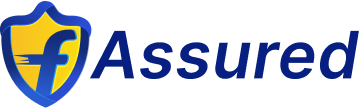
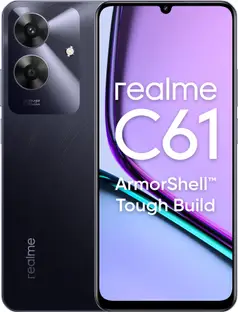
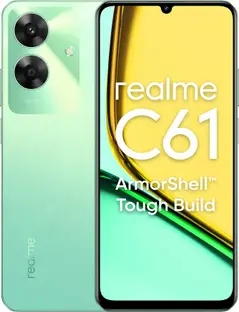
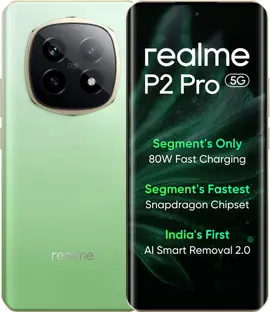
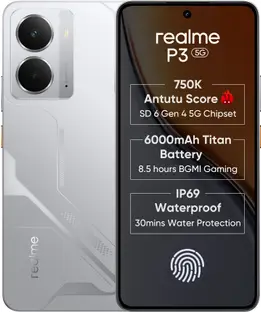
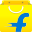
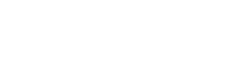
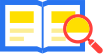
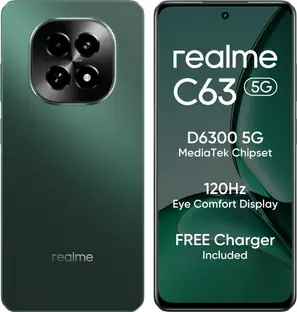
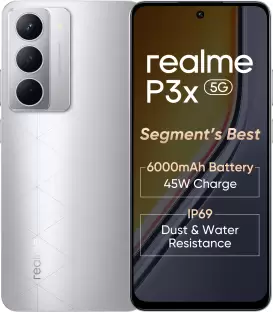
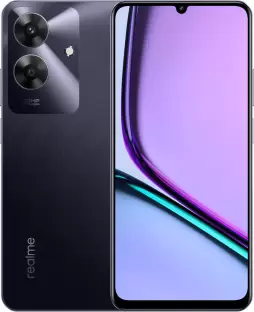
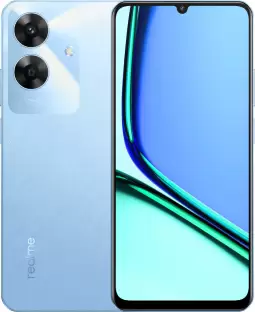
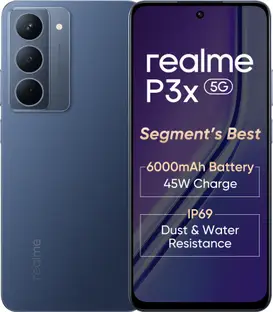
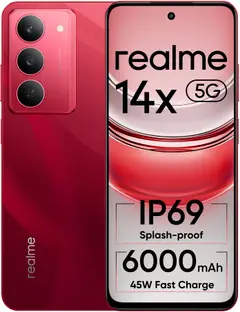
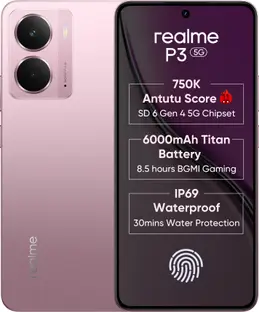
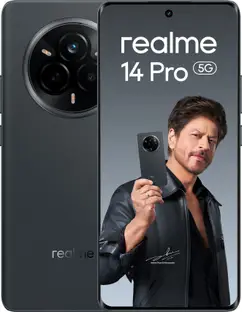
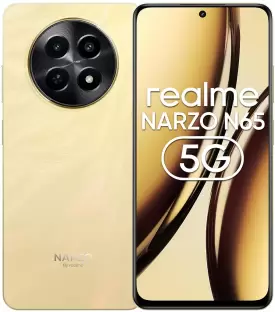
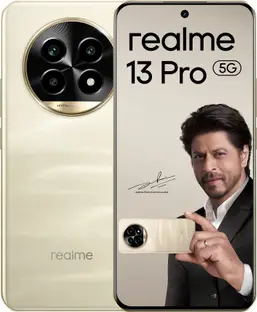
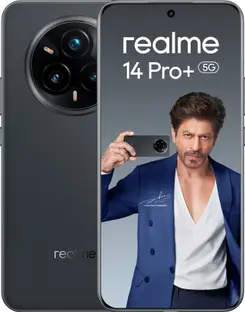
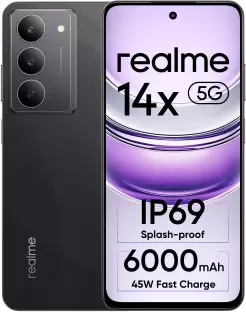
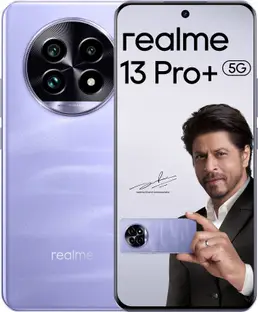
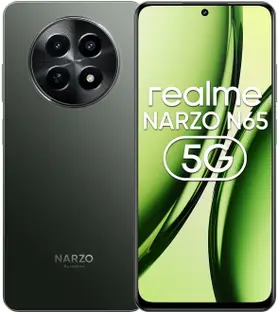
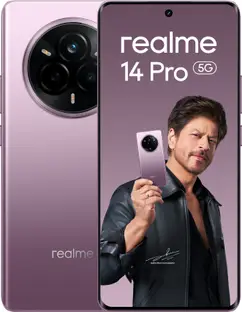
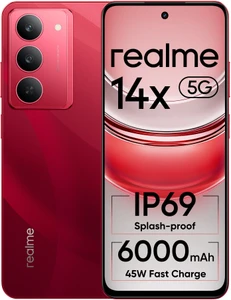
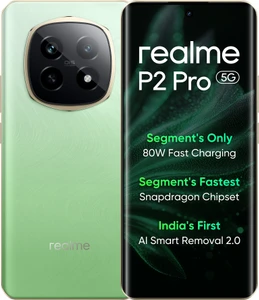
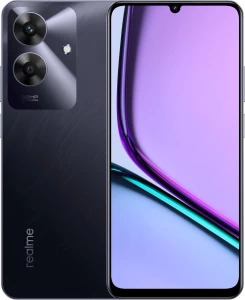
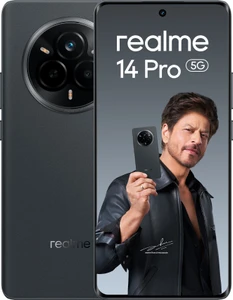
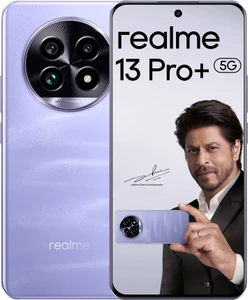
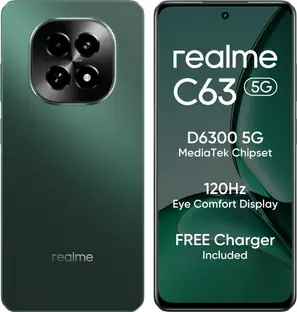
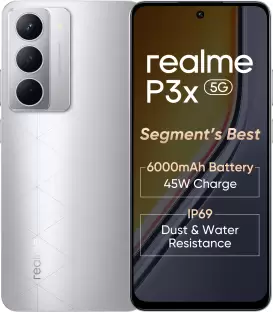
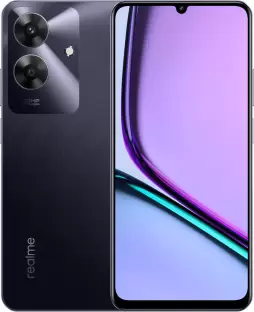
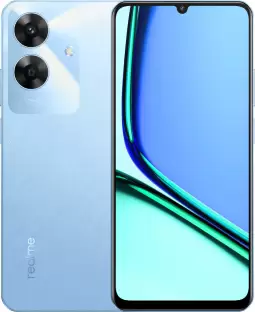
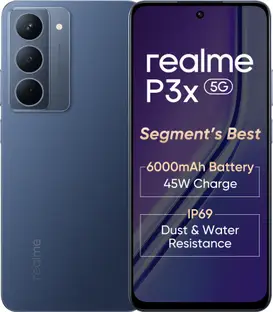
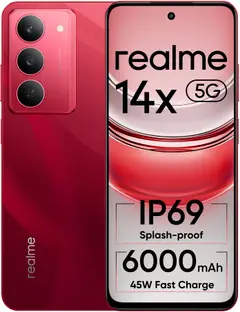
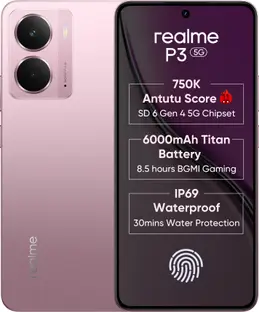
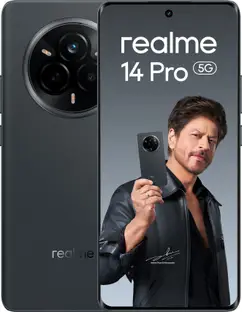
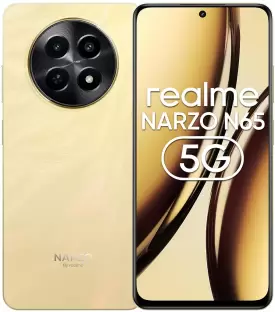
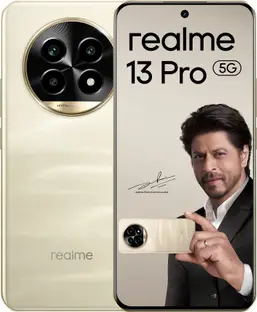
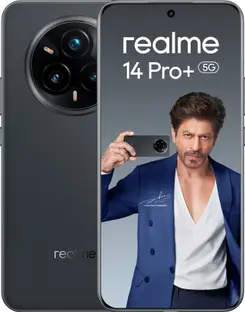
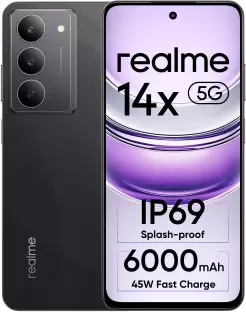
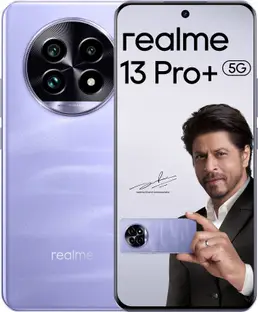
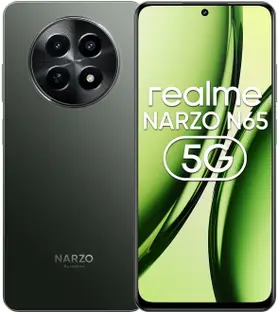
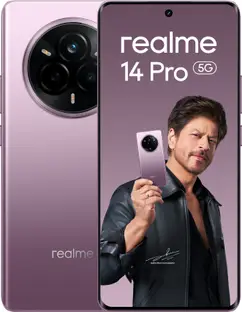

In [1]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(open('flipkart.html','r',encoding='utf-8'))
print(soup.prettify())

In [5]:
mn=soup.find_all('div',class_="KzDlHZ")
m=[]
for i in mn:
    m.append(i.text.strip())
print(m)

['realme C61 (Marble Black, 128 GB)', 'realme C61 (Safari Green, 128 GB)', 'realme C63 5G Charger in the Box (Forest Green, 128 GB)', 'realme P3x 5G (Lunar Silver, 128 GB)', 'realme C61 (Marble Black, 64 GB)', 'realme P2 Pro 5G (Parrot Green, 512 GB)', 'realme Narzo N61 (Marble Black, 64 GB)', 'realme Narzo N61 (Vyage Blue, 64 GB)', 'realme C61 (Safari Green, 64 GB)', 'realme P3x 5G (Midnight Blue, 128 GB)', 'realme 14x 5G (Jewel Red, 128 GB)', 'realme P3 5G (Nebula Pink, 128 GB)', 'realme P2 Pro 5G (Parrot Green, 128 GB)', 'realme P2 Pro 5G (Parrot Green, 256 GB)', 'realme P3 5G (Space Silver, 256 GB)', 'realme 14 Pro 5G (Suede Grey, 128 GB)', 'realme Narzo N65 5G (Ambr Gold, 128 GB)', 'realme 13 Pro 5G (Monet Gold, 512 GB)', 'realme 14 Pro+ 5G (Suede Grey, 512 GB)', 'realme 14x 5G (Crystal Black, 128 GB)', 'realme P3 5G (Space Silver, 128 GB)', 'realme 13 Pro+ 5G (Monet Purple, 256 GB)', 'realme Narzo N65 5G (Deep Green, 128 GB)', 'realme 14 Pro 5G (Jaipur Pink, 128 GB)']


In [7]:
price=soup.find_all('div',class_="Nx9bqj _4b5DiR")
p=[]
for i in price:
    p.append(i.text.strip())
print(p)

['₹8,199', '₹8,199', '₹10,999', '₹13,999', '₹7,699', '₹20,999', '₹7,380', '₹7,335', '₹7,699', '₹13,999', '₹14,999', '₹15,999', '₹17,999', '₹19,999', '₹18,499', '₹24,999', '₹12,448', '₹26,999', '₹37,999', '₹14,999', '₹15,999', '₹25,999', '₹10,471', '₹24,999']


In [14]:
rating=soup.find_all('div',class_="XQDdHH")
r=[]
c=0
for i in rating:
    if c<24:
        r.append(i.text.strip())
        c+=1
    else:
        break
print(r)

24


In [15]:
import pandas as pd
df = pd.DataFrame({"Mobile name":m,"Rating":r,"Price":p})
df

Mobile name Rating    Price
0                   realme C61 (Marble Black, 128 GB)    4.4   ₹8,199
1                   realme C61 (Safari Green, 128 GB)    4.4   ₹8,199
2   realme C63 5G Charger in the Box (Forest Green...    4.5  ₹10,999
3                realme P3x 5G (Lunar Silver, 128 GB)    4.5  ₹13,999
4                    realme C61 (Marble Black, 64 GB)    4.3   ₹7,699
5             realme P2 Pro 5G (Parrot Green, 512 GB)    4.4  ₹20,999
6              realme Narzo N61 (Marble Black, 64 GB)    4.3   ₹7,380
7                realme Narzo N61 (Vyage Blue, 64 GB)    4.3   ₹7,335
8                    realme C61 (Safari Green, 64 GB)    4.3   ₹7,699
9               realme P3x 5G (Midnight Blue, 128 GB)    4.5  ₹13,999
10                  realme 14x 5G (Jewel Red, 128 GB)    4.4  ₹14,999
11                 realme P3 5G (Nebula Pink, 128 GB)    4.4  ₹15,999
12            realme P2 Pro 5G (Parrot Green, 128 GB)    4.4  ₹17,999
13            realme P2 Pro 5G (Parrot Green, 256 GB)    4.4  ₹19,999
14                realme P3 5G (Space Silver, 256 GB)    4.4  ₹18,499
15              realme 14 Pro 5G (Suede Grey, 128 GB)    4.4  ₹24,999
16            realme Narzo N65 5G (Ambr Gold, 128 GB)    4.3  ₹12,448
17              realme 13 Pro 5G (Monet Gold, 512 GB)    4.3  ₹26,999
18             realme 14 Pro+ 5G (Suede Grey, 512 GB)    4.4  ₹37,999
19              realme 14x 5G (Crystal Black, 128 GB)    4.4  ₹14,999
20                realme P3 5G (Space Silver, 128 GB)    4.4  ₹15,999
21           realme 13 Pro+ 5G (Monet Purple, 256 GB)    4.4  ₹25,999
22           realme Narzo N65 5G (Deep Green, 128 GB)    4.3  ₹10,471
23             realme 14 Pro 5G (Jaipur Pink, 128 GB)    4.4  ₹24,999

In [37]:
import requests
from bs4 import BeautifulSoup
request_url="https://subslikescript.com/movies"
result=requests.get(request_url)
content=result.text

In [38]:
soup=BeautifulSoup(content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-120598793-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-120598793-1');
  </script>
  <meta charset="utf-8"/>
  <title>
   All English transcripts for movies  | Subs like Script
  </title>
  <meta content="List of movie scripts " name="description"/>
  <meta content="transcript, movie, subtitles, scripts, film, video, media, subs, srt " name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <meta content="vMbhs5RzkXtG63Zn1UHgW0wnKZpcGtXAUkHjyeoF" name="csrf-token"/>
  <link as="style" href="https://subslikescript.com/build/assets/app-aqNRnyHK.css" rel="preload"

In [39]:
x=soup.find('ul',class_="scripts-list")
y=x.find_all('a')
print(y)

[<a href="/movie/Hijo_de_Buitre-12325576" title="Read transcript of Movie 'Hijo de Buitre'">
        Hijo de Buitre (2015)
    </a>, <a href="/movie/Ron_Carter_Finding_the_Right_Notes-22072182" title="Read transcript of Movie 'Ron Carter: Finding the Right Notes'">
        Ron Carter: Finding the Right Notes (2022)
    </a>, <a href="/movie/The_Nomad-13009174" title="Read transcript of Movie 'The Nomad'">
        The Nomad (2023)
    </a>, <a href="/movie/Squeal-8726850" title="Read transcript of Movie 'Squeal'">
        Squeal ()
    </a>, <a href="/movie/Vacation_Home_Nightmare-26458228" title="Read transcript of Movie 'Vacation Home Nightmare'">
        Vacation Home Nightmare (2023)
    </a>, <a href="/movie/Love_in_Glacier_National_A_National_Park_Romance-25049966" title="Read transcript of Movie 'Love in Glacier National: A National Park Romance'">
        Love in Glacier National: A National Park Romance (2023)
    </a>, <a href="/movie/Stars_Fell_Again-15837716" title="Read tra

In [43]:
link=[]
for i in y:
    link.append("https://subslikescript.com"+i['href'])
print(link)

['https://subslikescript.com/movie/Hijo_de_Buitre-12325576', 'https://subslikescript.com/movie/Ron_Carter_Finding_the_Right_Notes-22072182', 'https://subslikescript.com/movie/The_Nomad-13009174', 'https://subslikescript.com/movie/Squeal-8726850', 'https://subslikescript.com/movie/Vacation_Home_Nightmare-26458228', 'https://subslikescript.com/movie/Love_in_Glacier_National_A_National_Park_Romance-25049966', 'https://subslikescript.com/movie/Stars_Fell_Again-15837716', 'https://subslikescript.com/movie/Daughter_of_the_Bride-21106970', 'https://subslikescript.com/movie/Hostile_Forces-13646080', 'https://subslikescript.com/movie/Lego_Star_Wars_The_Padawan_Menace-2005268', 'https://subslikescript.com/movie/Gereza-22857380', 'https://subslikescript.com/movie/Dragon_Hunter-22008250', 'https://subslikescript.com/movie/House_of_Inequity-5598934', 'https://subslikescript.com/movie/Jackpot_Island_Kumanthong_Returns-25260658', 'https://subslikescript.com/movie/Match-13490000', 'https://subslikescr

In [46]:
movie=[]
for i in y:
    movie.append(i.text.strip())
movie

['Hijo de Buitre (2015)',
 'Ron Carter: Finding the Right Notes (2022)',
 'The Nomad (2023)',
 'Squeal ()',
 'Vacation Home Nightmare (2023)',
 'Love in Glacier National: A National Park Romance (2023)',
 'Stars Fell Again (2023)',
 'Daughter of the Bride (2023)',
 'Hostile Forces (2023)',
 'Lego Star Wars: The Padawan Menace (2011)',
 'Gereza (2022)',
 'Dragon Hunter (2022)',
 'House of Inequity (2021)',
 'Jackpot Island: Kumanthong Returns (2022)',
 'Match (2022)',
 'Snow White and the Fairytale Fun Force (2023)',
 'The Love Club (2023)',
 'Haunted Hotties (2022)',
 'One Year Off (2023)',
 'Sweeter Than Chocolate (2023)',
 'Disquiet (2023)',
 'Among the Beasts (2023)',
 'Taming Speed (2022)',
 'Randy Feltface: The Last Temptation of Randy (2020)',
 'Alemanji (2021)',
 'Darkheart Manor (2022)',
 'Innocent Vengeance (2023)',
 'Ho Ja Mukt (2023)',
 'Boy from Nowhere (2023)',
 'Rent-a-Groom (2023)']

In [44]:
for i in link:
    print(i)

https://subslikescript.com/movie/Hijo_de_Buitre-12325576
https://subslikescript.com/movie/Ron_Carter_Finding_the_Right_Notes-22072182
https://subslikescript.com/movie/The_Nomad-13009174
https://subslikescript.com/movie/Squeal-8726850
https://subslikescript.com/movie/Vacation_Home_Nightmare-26458228
https://subslikescript.com/movie/Love_in_Glacier_National_A_National_Park_Romance-25049966
https://subslikescript.com/movie/Stars_Fell_Again-15837716
https://subslikescript.com/movie/Daughter_of_the_Bride-21106970
https://subslikescript.com/movie/Hostile_Forces-13646080
https://subslikescript.com/movie/Lego_Star_Wars_The_Padawan_Menace-2005268
https://subslikescript.com/movie/Gereza-22857380
https://subslikescript.com/movie/Dragon_Hunter-22008250
https://subslikescript.com/movie/House_of_Inequity-5598934
https://subslikescript.com/movie/Jackpot_Island_Kumanthong_Returns-25260658
https://subslikescript.com/movie/Match-13490000
https://subslikescript.com/movie/Snow_White_and_the_Fairytale_Fun_

In [47]:
z=0
for i in link:
    
    request_url=i
    print(request_url)
    result=requests.get(request_url)
    content=result.text
    soup=BeautifulSoup(content,'html.parser')
    
    transcript=soup.find('div',class_='full-script').text.strip()
    file=open(movie[z]+".txt",'w',encoding='utf-8') 
    file.write(transcript)
    z+=1
    file.close()

https://subslikescript.com/movie/Hijo_de_Buitre-12325576
https://subslikescript.com/movie/Ron_Carter_Finding_the_Right_Notes-22072182
https://subslikescript.com/movie/The_Nomad-13009174
https://subslikescript.com/movie/Squeal-8726850
https://subslikescript.com/movie/Vacation_Home_Nightmare-26458228
https://subslikescript.com/movie/Love_in_Glacier_National_A_National_Park_Romance-25049966
https://subslikescript.com/movie/Stars_Fell_Again-15837716
https://subslikescript.com/movie/Daughter_of_the_Bride-21106970
https://subslikescript.com/movie/Hostile_Forces-13646080
https://subslikescript.com/movie/Lego_Star_Wars_The_Padawan_Menace-2005268
https://subslikescript.com/movie/Gereza-22857380
https://subslikescript.com/movie/Dragon_Hunter-22008250
https://subslikescript.com/movie/House_of_Inequity-5598934
https://subslikescript.com/movie/Jackpot_Island_Kumanthong_Returns-25260658
https://subslikescript.com/movie/Match-13490000
https://subslikescript.com/movie/Snow_White_and_the_Fairytale_Fun_

In [55]:
# l1=[]
# for i in range(1,5):
#     request_url="https://www.politifact.com/factchecks/"+str(i)
#     result=requests.get(request_url)
#     content=result.text
#     soup=BeautifulSoup(content,'html.parser')
#     l=[]
#     x=soup.find_all('li',class_="o-listicle__list")
#     for j in x:
#         y=x.find('div',class_="m-statement__quote").text.strip()
#         link="https://www.politifact.com/factchecks"
#         link+=y.find('div',class_='m-statement__quote').find('a')['href'].strip()
#         date+=soup.find("footer", class_="m-statement__footer").text.split("•")[1].strip()
#         source=j.find('a',class_='m-statement__name').text.strip()
#         l.append((y,link,date,source))
# l1.extend(l)

<!DOCTYPE html>
<html lang="en" style="">
 <!--
 Page saved with SingleFile 
 url: https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DAPPLE&param=167811&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkFwcGxlIFNtYXJ0cGhvbmVzIl0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&bu=MOBILE&wid=33.productCard.PMU_V2_26 
 saved date: Fri May 30 2025 08:53:11 GMT+0530 (India Standard Time)
-->
 <head>
  <meta charset="utf-8"/>
  <style>
   :root{--sf-img-17: url("");--sf-img-19: url("");--sf-img-20: url("");--sf-img-22: url("");--sf-img-25: url("");--sf-img-29: url("")}
  </style>
  <style id="react-native-stylesheet">
   html{text-size-adjust:100%;-webkit-tap-highlight-color:rgba(0,0,0,0)}body{margin:0px}input::-webkit-search-cancel-button,input::-webkit-search-decoration,input::-webkit-search-results-button,input::-webkit-search-results-decoration{display:
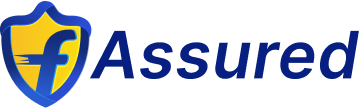
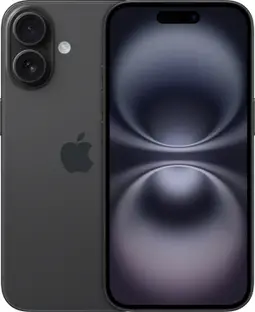
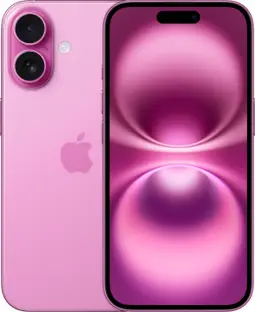
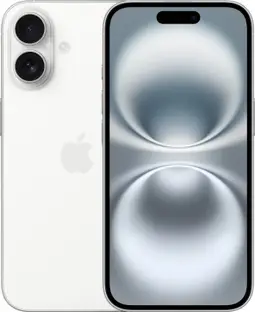
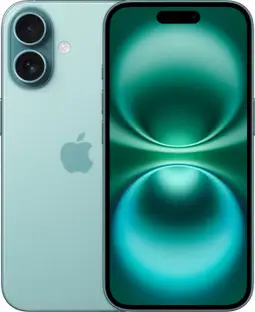
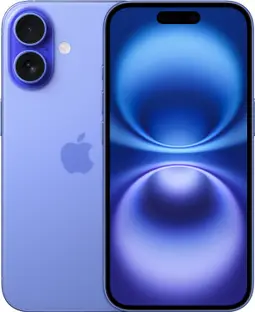
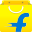
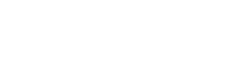
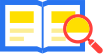
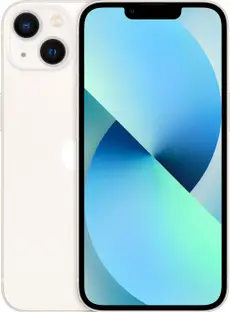
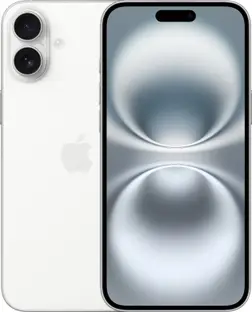
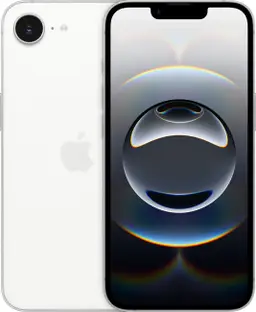
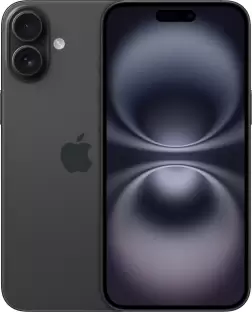
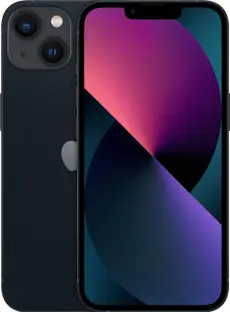
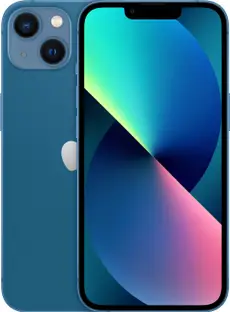
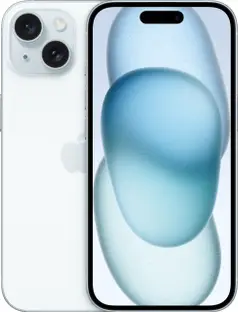
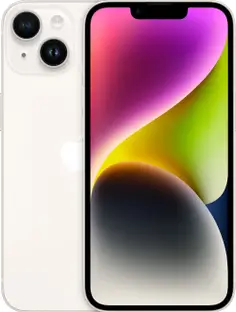
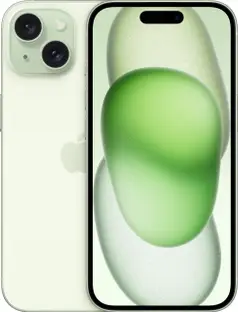
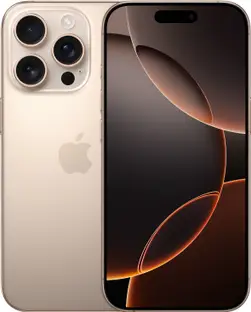
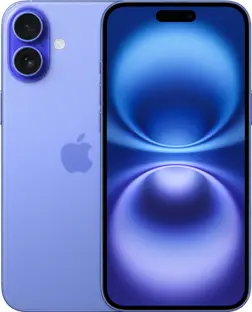
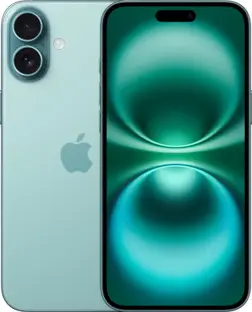
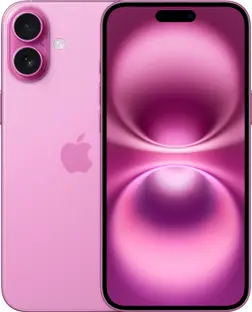
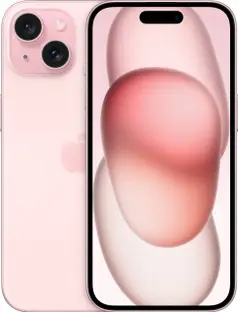

In [2]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(open('newflipkart.html','r',encoding='utf-8'))
print(soup.prettify())

In [55]:
mn=soup.find_all('div',class_="KzDlHZ")
m=[]
for i in mn:
    m.append(i.text.strip())
print(m)

['Apple iPhone 16 (Black, 128 GB)', 'Apple iPhone 16 (Pink, 128 GB)', 'Apple iPhone 13 (Starlight, 128 GB)', 'Apple iPhone 16 (White, 128 GB)', 'Apple iPhone 16 Plus (White, 128 GB)', 'Apple iPhone 16e (White, 128 GB)', 'Apple iPhone 16 (Teal, 128 GB)', 'Apple iPhone 16 Plus (Black, 128 GB)', 'Apple iPhone 13 (Midnight, 128 GB)', 'Apple iPhone 13 (Blue, 128 GB)', 'Apple iPhone 16 (Ultramarine, 128 GB)', 'Apple iPhone 15 (Blue, 128 GB)', 'Apple iPhone 16 (Black, 256 GB)', 'Apple iPhone 16 (Ultramarine, 256 GB)', 'Apple iPhone 14 (Starlight, 128 GB)', 'Apple iPhone 16 (Pink, 256 GB)', 'Apple iPhone 16 (White, 256 GB)', 'Apple iPhone 15 Plus (Green, 256 GB)', 'Apple iPhone 16 Pro (Desert Titanium, 256 GB)', 'Apple iPhone 16 Plus (Ultramarine, 256 GB)', 'Apple iPhone 16 (Teal, 256 GB)', 'Apple iPhone 16 Plus (Teal, 128 GB)', 'Apple iPhone 16 Plus (Pink, 256 GB)', 'Apple iPhone 15 (Pink, 256 GB)']


In [56]:
name=[]
for i in m:
    name.append(i.split('(')[0])
print(name)

['Apple iPhone 16 ', 'Apple iPhone 16 ', 'Apple iPhone 13 ', 'Apple iPhone 16 ', 'Apple iPhone 16 Plus ', 'Apple iPhone 16e ', 'Apple iPhone 16 ', 'Apple iPhone 16 Plus ', 'Apple iPhone 13 ', 'Apple iPhone 13 ', 'Apple iPhone 16 ', 'Apple iPhone 15 ', 'Apple iPhone 16 ', 'Apple iPhone 16 ', 'Apple iPhone 14 ', 'Apple iPhone 16 ', 'Apple iPhone 16 ', 'Apple iPhone 15 Plus ', 'Apple iPhone 16 Pro ', 'Apple iPhone 16 Plus ', 'Apple iPhone 16 ', 'Apple iPhone 16 Plus ', 'Apple iPhone 16 Plus ', 'Apple iPhone 15 ']


In [69]:
c=[]
mem=[]
for i in m:
    i=i.split('(')[1]
    cl=i.split(',')[0]
    c.append(cl)
    i=i.split(')')[0]
    mm=i.split(',')[1]
    mem.append(mm)
print(c)
print(mem)

['Black', 'Pink', 'Starlight', 'White', 'White', 'White', 'Teal', 'Black', 'Midnight', 'Blue', 'Ultramarine', 'Blue', 'Black', 'Ultramarine', 'Starlight', 'Pink', 'White', 'Green', 'Desert Titanium', 'Ultramarine', 'Teal', 'Teal', 'Pink', 'Pink']
24


In [71]:
nprice=soup.find_all('div',class_="Nx9bqj _4b5DiR")
np1=[]
for i in nprice:
    np1.append(i.text.strip())
print(np1)

['₹74,900', '₹74,900', '₹44,999', '₹74,900', '₹84,900', '₹54,900', '₹74,900', '₹84,900', '₹44,999', '₹44,999', '₹74,900', '₹64,400', '₹84,900', '₹84,900', '₹54,999', '₹84,900', '₹84,900', '₹84,900', '₹1,22,900', '₹94,900', '₹84,900', '₹84,900', '₹94,900', '₹74,400']


In [72]:
oprice=soup.find_all('div',class_='yRaY8j ZYYwLA')
op=[]
for i in oprice:
    op.append(i.text.strip())
print(op)

['₹79,900', '₹79,900', '₹49,900', '₹79,900', '₹89,900', '₹59,900', '₹79,900', '₹89,900', '₹49,900', '₹49,900', '₹79,900', '₹69,900', '₹89,900', '₹89,900', '₹59,900', '₹89,900', '₹89,900', '₹89,900', '₹1,29,900', '₹99,900', '₹89,900', '₹89,900', '₹99,900', '₹79,900']


In [21]:
stars=soup.find_all('div',class_="XQDdHH")
s=[]
for i in stars:
    s.append(i.text.strip())
print(s)

['4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.6', '4.7', '4.6', '4.6', '4.6', '4.6', '4.6']


In [74]:
dis=soup.find_all('div',class_='UkUFwK')
d=[]
for i in dis:
    d.append(i.text.strip().split(" ")[0])
print(d)

['6%', '6%', '9%', '6%', '5%', '8%', '6%', '5%', '9%', '9%', '6%', '7%', '5%', '5%', '8%', '5%', '5%', '5%', '5%', '5%', '5%', '5%', '5%', '6%']


In [57]:
rev=soup.find_all('span',class_='Wphh3N')
r=[]
for i in rev:
    x=i.text.strip().split(" ")[1]
    r.append(x.split("&")[1][1:])
print(r)

['704', '704', '13,902', '704', '143', '51', '704', '143', '13,902', '13,902', '704', '9,296', '704', '704', '11,672', '704', '704', '2,541', '104', '143', '704', '143', '143', '9,296']


In [75]:
import pandas as pd
df = pd.DataFrame({"Mobile name":name,"Memory":mem,"Color":c,"Stars":s,"Reviews":r,"New Price":np1,"Old price":op,"Discount":d})
df

Mobile name   Memory            Color Stars Reviews  New Price  \
0        Apple iPhone 16    128 GB            Black   4.6     704    ₹74,900   
1        Apple iPhone 16    128 GB             Pink   4.6     704    ₹74,900   
2        Apple iPhone 13    128 GB        Starlight   4.6  13,902    ₹44,999   
3        Apple iPhone 16    128 GB            White   4.6     704    ₹74,900   
4   Apple iPhone 16 Plus    128 GB            White   4.6     143    ₹84,900   
5       Apple iPhone 16e    128 GB            White   4.6      51    ₹54,900   
6        Apple iPhone 16    128 GB             Teal   4.6     704    ₹74,900   
7   Apple iPhone 16 Plus    128 GB            Black   4.6     143    ₹84,900   
8        Apple iPhone 13    128 GB         Midnight   4.6  13,902    ₹44,999   
9        Apple iPhone 13    128 GB             Blue   4.6  13,902    ₹44,999   
10       Apple iPhone 16    128 GB      Ultramarine   4.6     704    ₹74,900   
11       Apple iPhone 15    128 GB             Blue   4.6   9,296    ₹64,400   
12       Apple iPhone 16    256 GB            Black   4.6     704    ₹84,900   
13       Apple iPhone 16    256 GB      Ultramarine   4.6     704    ₹84,900   
14       Apple iPhone 14    128 GB        Starlight   4.6  11,672    ₹54,999   
15       Apple iPhone 16    256 GB             Pink   4.6     704    ₹84,900   
16       Apple iPhone 16    256 GB            White   4.6     704    ₹84,900   
17  Apple iPhone 15 Plus    256 GB            Green   4.6   2,541    ₹84,900   
18   Apple iPhone 16 Pro    256 GB  Desert Titanium   4.7     104  ₹1,22,900   
19  Apple iPhone 16 Plus    256 GB      Ultramarine   4.6     143    ₹94,900   
20       Apple iPhone 16    256 GB             Teal   4.6     704    ₹84,900   
21  Apple iPhone 16 Plus    128 GB             Teal   4.6     143    ₹84,900   
22  Apple iPhone 16 Plus    256 GB             Pink   4.6     143    ₹94,900   
23       Apple iPhone 15    256 GB             Pink   4.6   9,296    ₹74,400   

    Old price Discount  
0     ₹79,900       6%  
1     ₹79,900       6%  
2     ₹49,900       9%  
3     ₹79,900       6%  
4     ₹89,900       5%  
5     ₹59,900       8%  
6     ₹79,900       6%  
7     ₹89,900       5%  
8     ₹49,900       9%  
9     ₹49,900       9%  
10    ₹79,900       6%  
11    ₹69,900       7%  
12    ₹89,900       5%  
13    ₹89,900       5%  
14    ₹59,900       8%  
15    ₹89,900       5%  
16    ₹89,900       5%  
17    ₹89,900       5%  
18  ₹1,29,900       5%  
19    ₹99,900       5%  
20    ₹89,900       5%  
21    ₹89,900       5%  
22    ₹99,900       5%  
23    ₹79,900       6%

# 13-06-25


<!DOCTYPE html>
<html class="" lang="en" style="">
 <!--
 Page saved with SingleFile 
 url: https://www.espncricinfo.com/series/icc-world-test-championship-2023-2025-1345943/australia-vs-south-africa-final-1449769/live-cricket-score 
 saved date: Fri Jun 13 2025 10:26:23 GMT+0530 (India Standard Time)
-->
 <head>
  <meta charset="utf-8"/>
  <meta content="A7vZI3v+Gz7JfuRolKNM4Aff6zaGuT7X0mf3wtoZTnKv6497cVMnhy03KDqX7kBz/q/iidW7srW31oQbBt4VhgoAAACUeyJvcmlnaW4iOiJodHRwczovL3d3dy5nb29nbGUuY29tOjQ0MyIsImZlYXR1cmUiOiJEaXNhYmxlVGhpcmRQYXJ0eVN0b3JhZ2VQYXJ0aXRpb25pbmczIiwiZXhwaXJ5IjoxNzU3OTgwODAwLCJpc1N1YmRvbWFpbiI6dHJ1ZSwiaXNUaGlyZFBhcnR5Ijp0cnVlfQ==" http-equiv="origin-trial"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <link href="https://wassets.hscicdn.com/static/images/iphone5_splash.png" media="(device-width: 320px) and (device-height: 568px) and (-webkit-device-pixel-ratio: 2)" rel="apple-touch-startup-image"/>
  <link
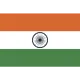
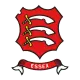
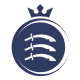
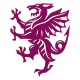
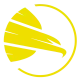
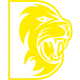
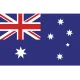
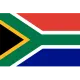
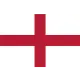
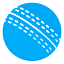
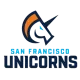
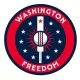
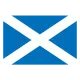
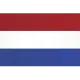
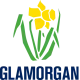
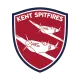
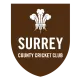
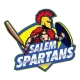
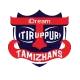
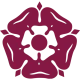
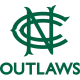
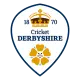
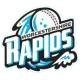
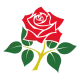
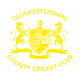
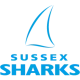
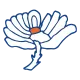
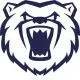
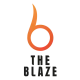
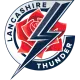
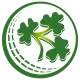
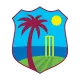
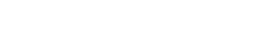
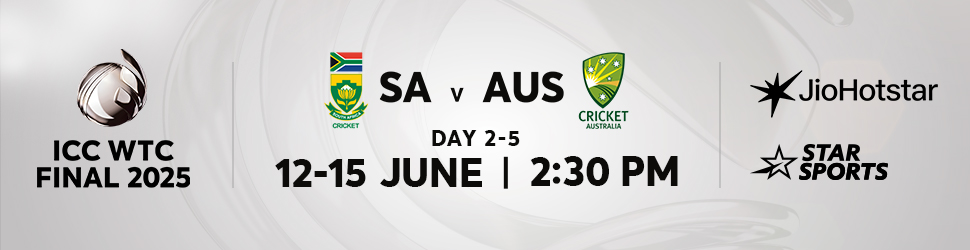
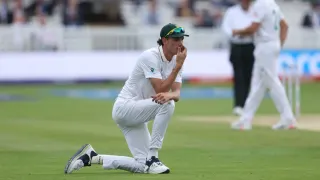
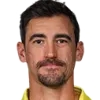
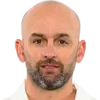
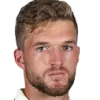
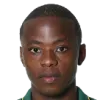
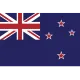
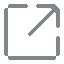
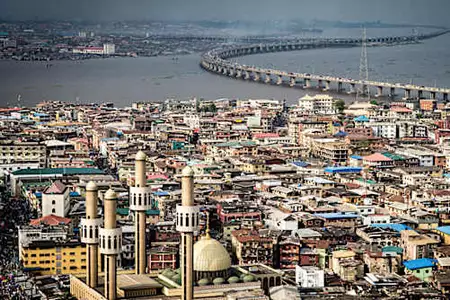
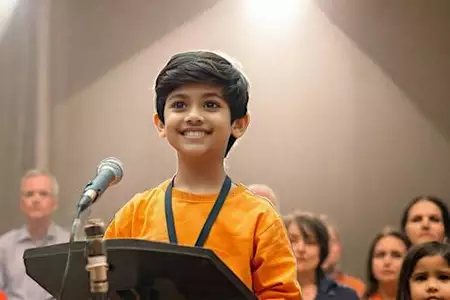
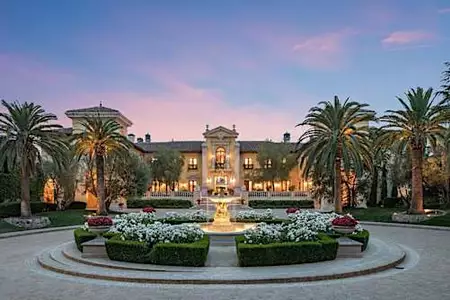
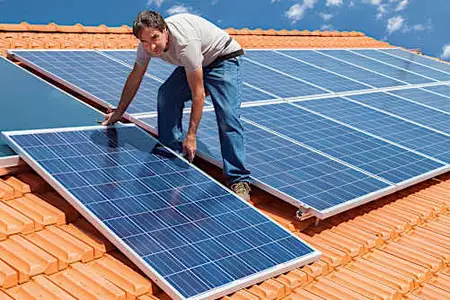
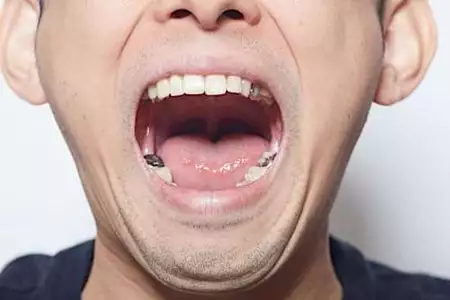
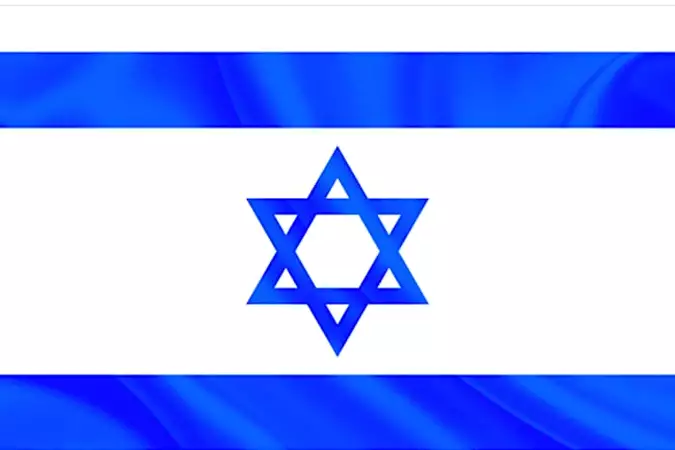
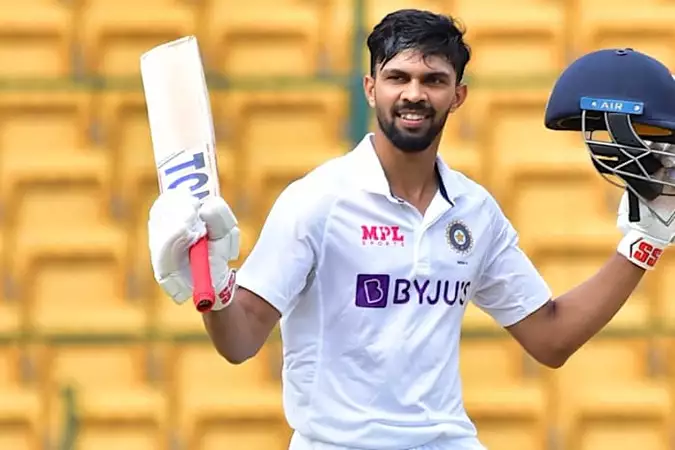
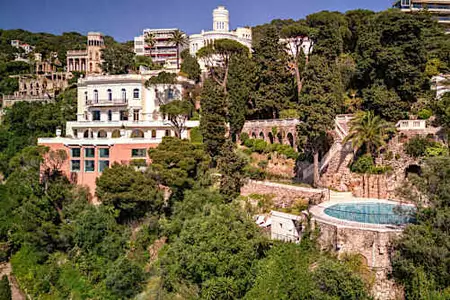
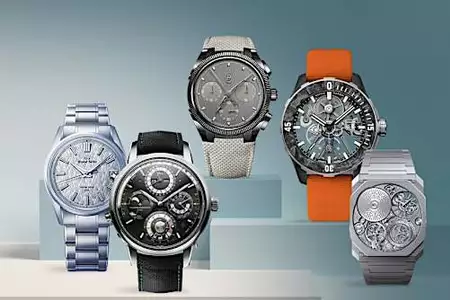
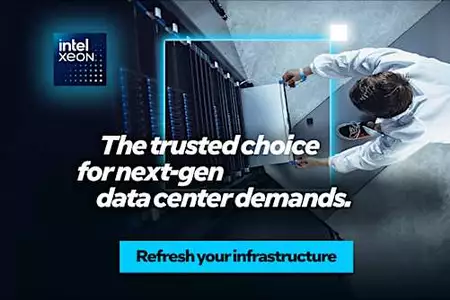
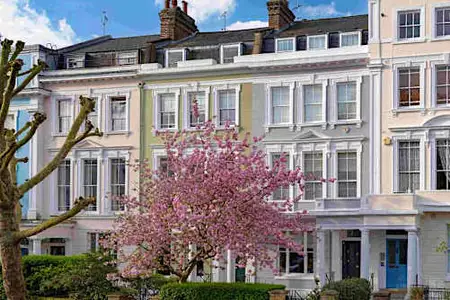
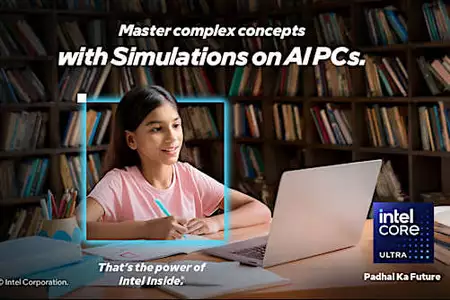
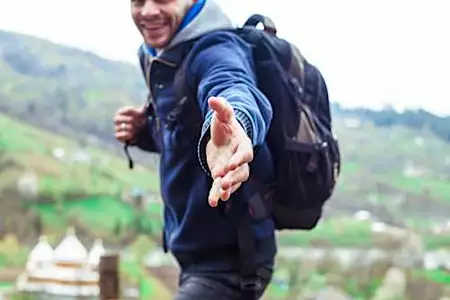
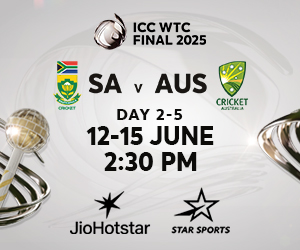
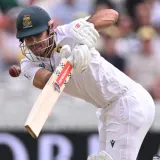
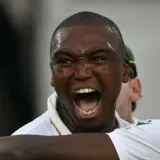
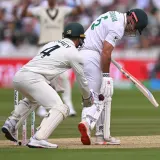
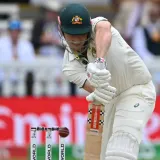
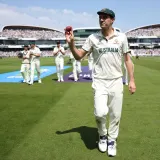
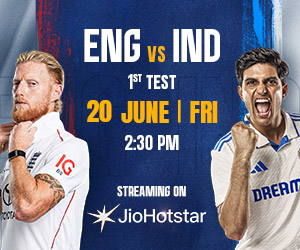
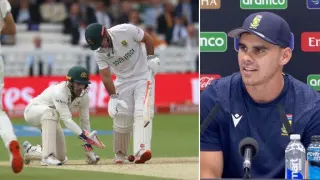
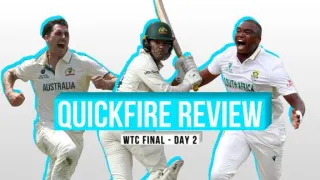
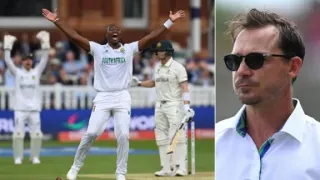
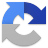

In [1]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(open('cricinfo.html','r',encoding='utf-8'))
print(soup.prettify())

In [10]:
# as1=soup.find('div',class_="ds-text-compact-m ds-text-typo ds-text-right ds-whitespace-nowrap")
ov=soup.find('span',class_='ds-text-compact-s ds-mr-0.5')
print(s1.text.strip())

(40 ov)


In [18]:
aus1=soup.find('strong',class_='ds-text-typo-mid3')
print(aus1.text.strip())

212 &


212
